In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2



## Data Loading

In [76]:
# Loading dataset
file_path = '/Users/chenjiayi/Desktop/Deep Leanring/Assignment 1/diabetes.csv'
data = pd.read_csv(file_path)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [78]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Pre-processing

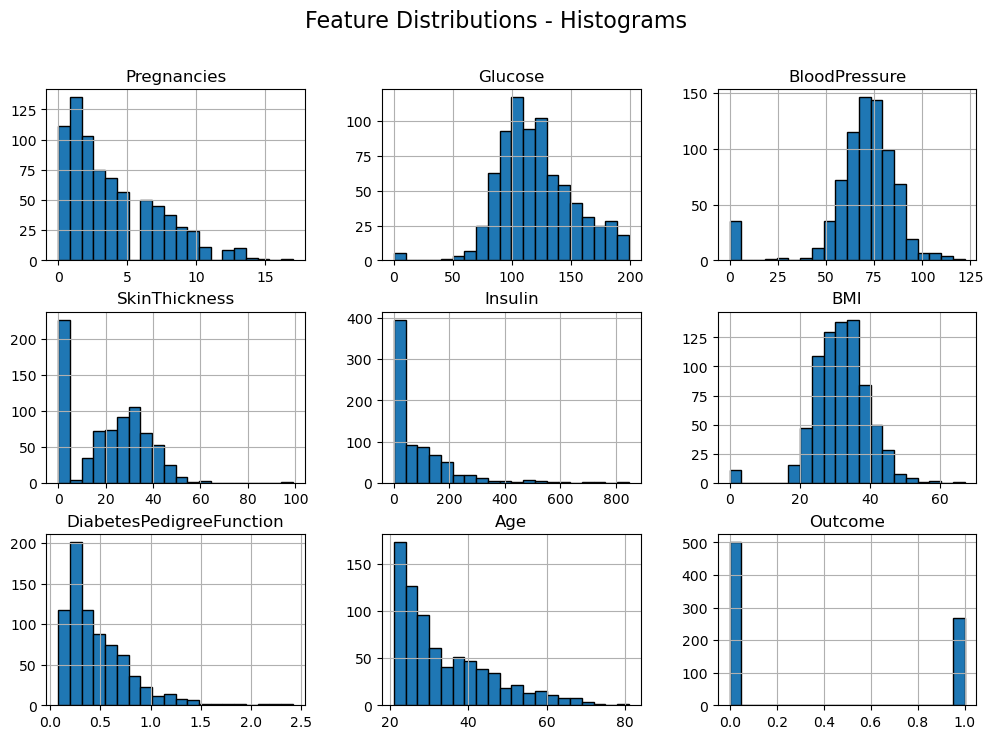

In [79]:
# Plot feature distribution histograms
data.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle('Feature Distributions - Histograms', fontsize=16)
plt.show()

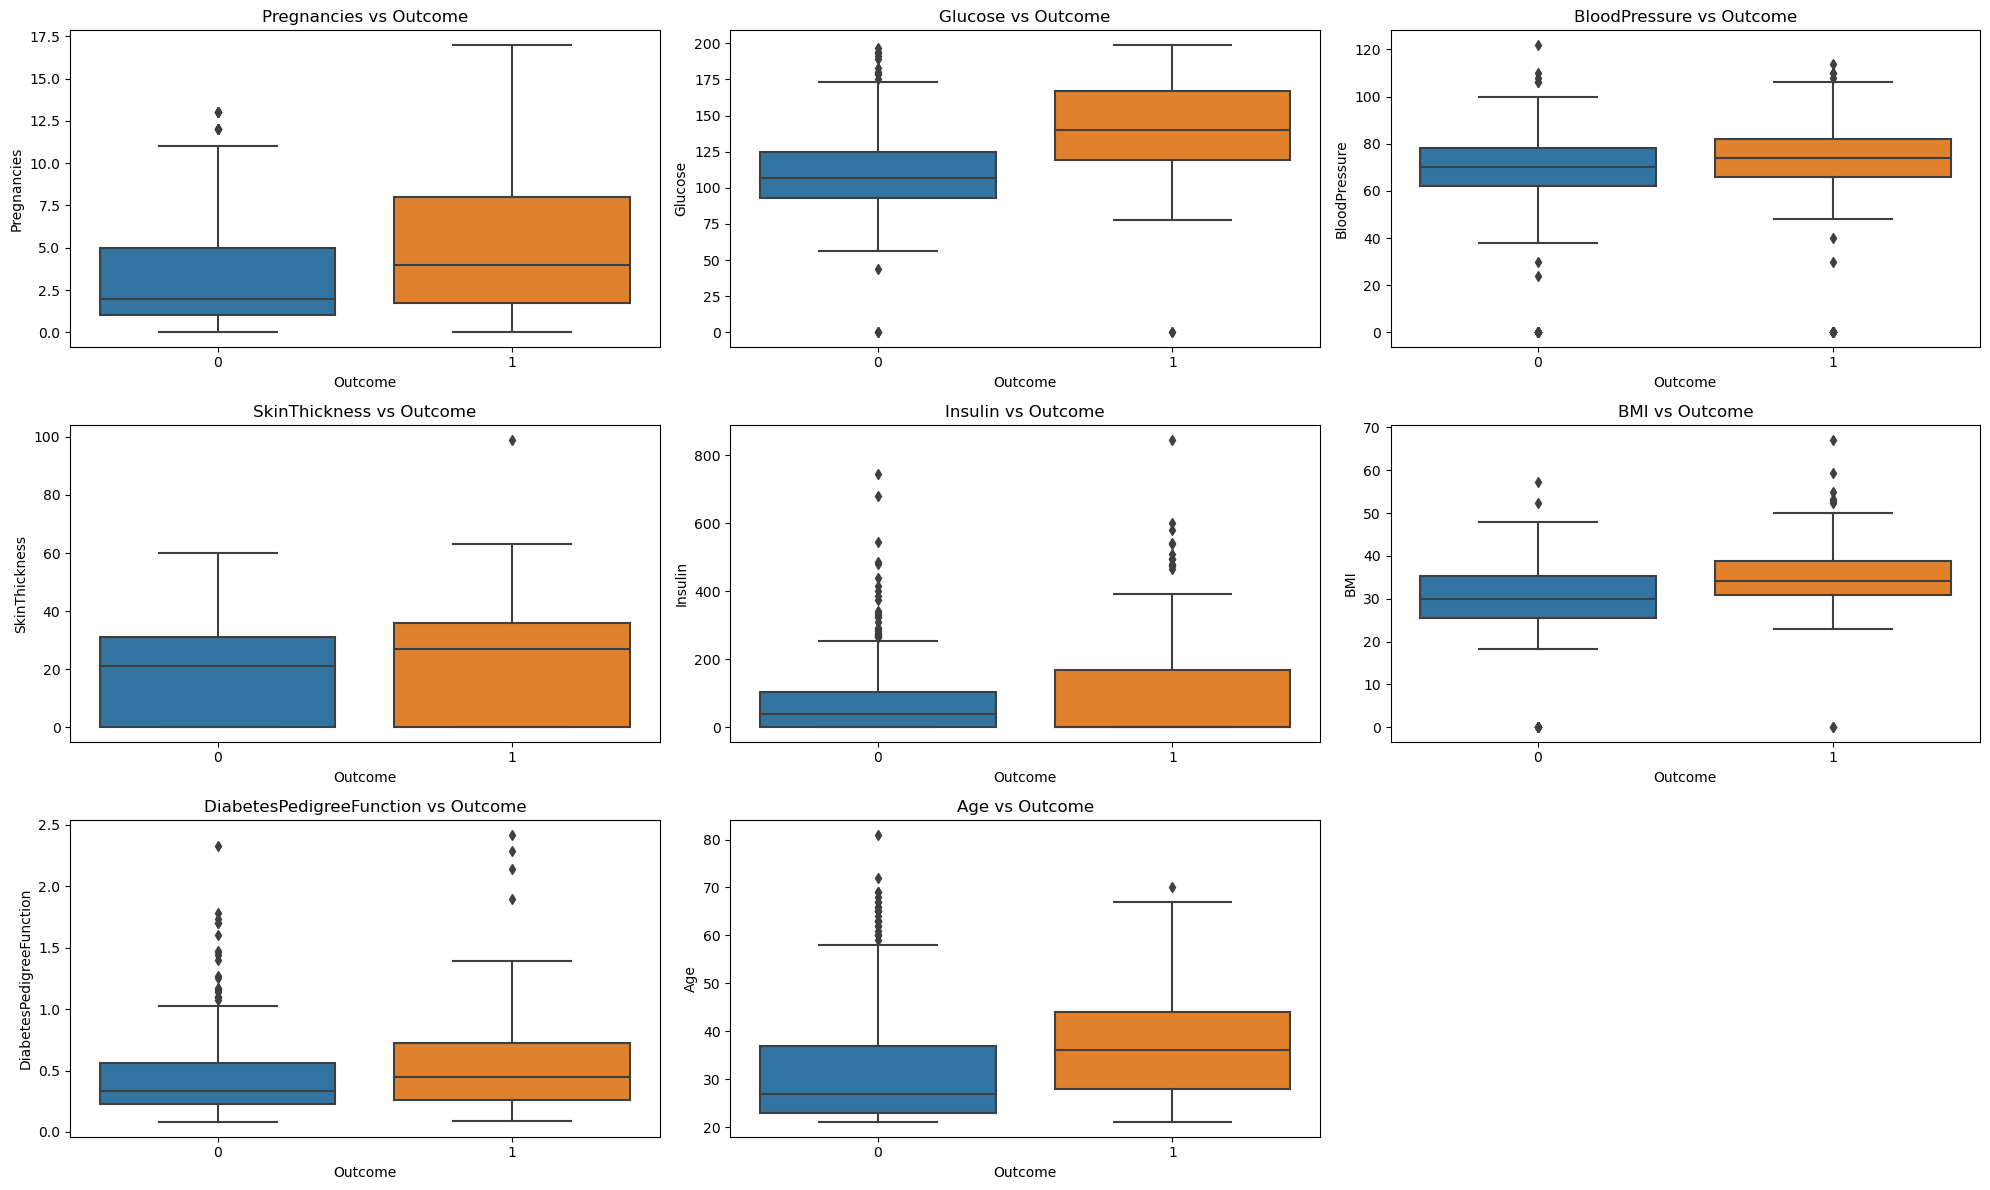

In [80]:
# Plot Boxplot for each Feature vs Outcome
features = data.columns[:-1]
plt.figure(figsize=(20, 12))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1) 
    sns.boxplot(x='Outcome', y=feature, data=data)
    plt.title(f'{feature} vs Outcome')
plt.tight_layout()
plt.show()


In [95]:
# Use IQR method to remove outliers
def remove_outliers_iqr(df, columns):
    for i in columns:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]
    return df

data_cleaned = remove_outliers_iqr(data, data.columns)
for i in data.columns:
    data_cleaned[i].fillna(data_cleaned[i].median())
    
data_cleaned.isnull().sum()




Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Data Visulization

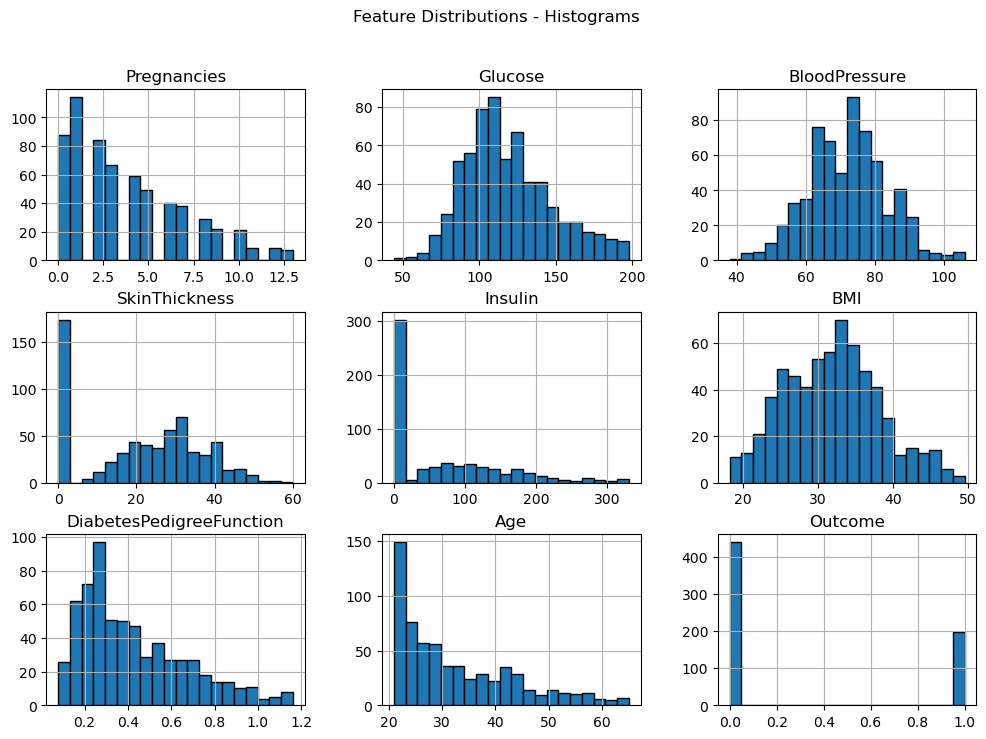

In [91]:
# Plot feature distribution histograms of cleaned data
data_cleaned.hist(figsize=(12, 8), bins=20,  edgecolor='black')
plt.suptitle('Feature Distributions - Histograms')
plt.show()

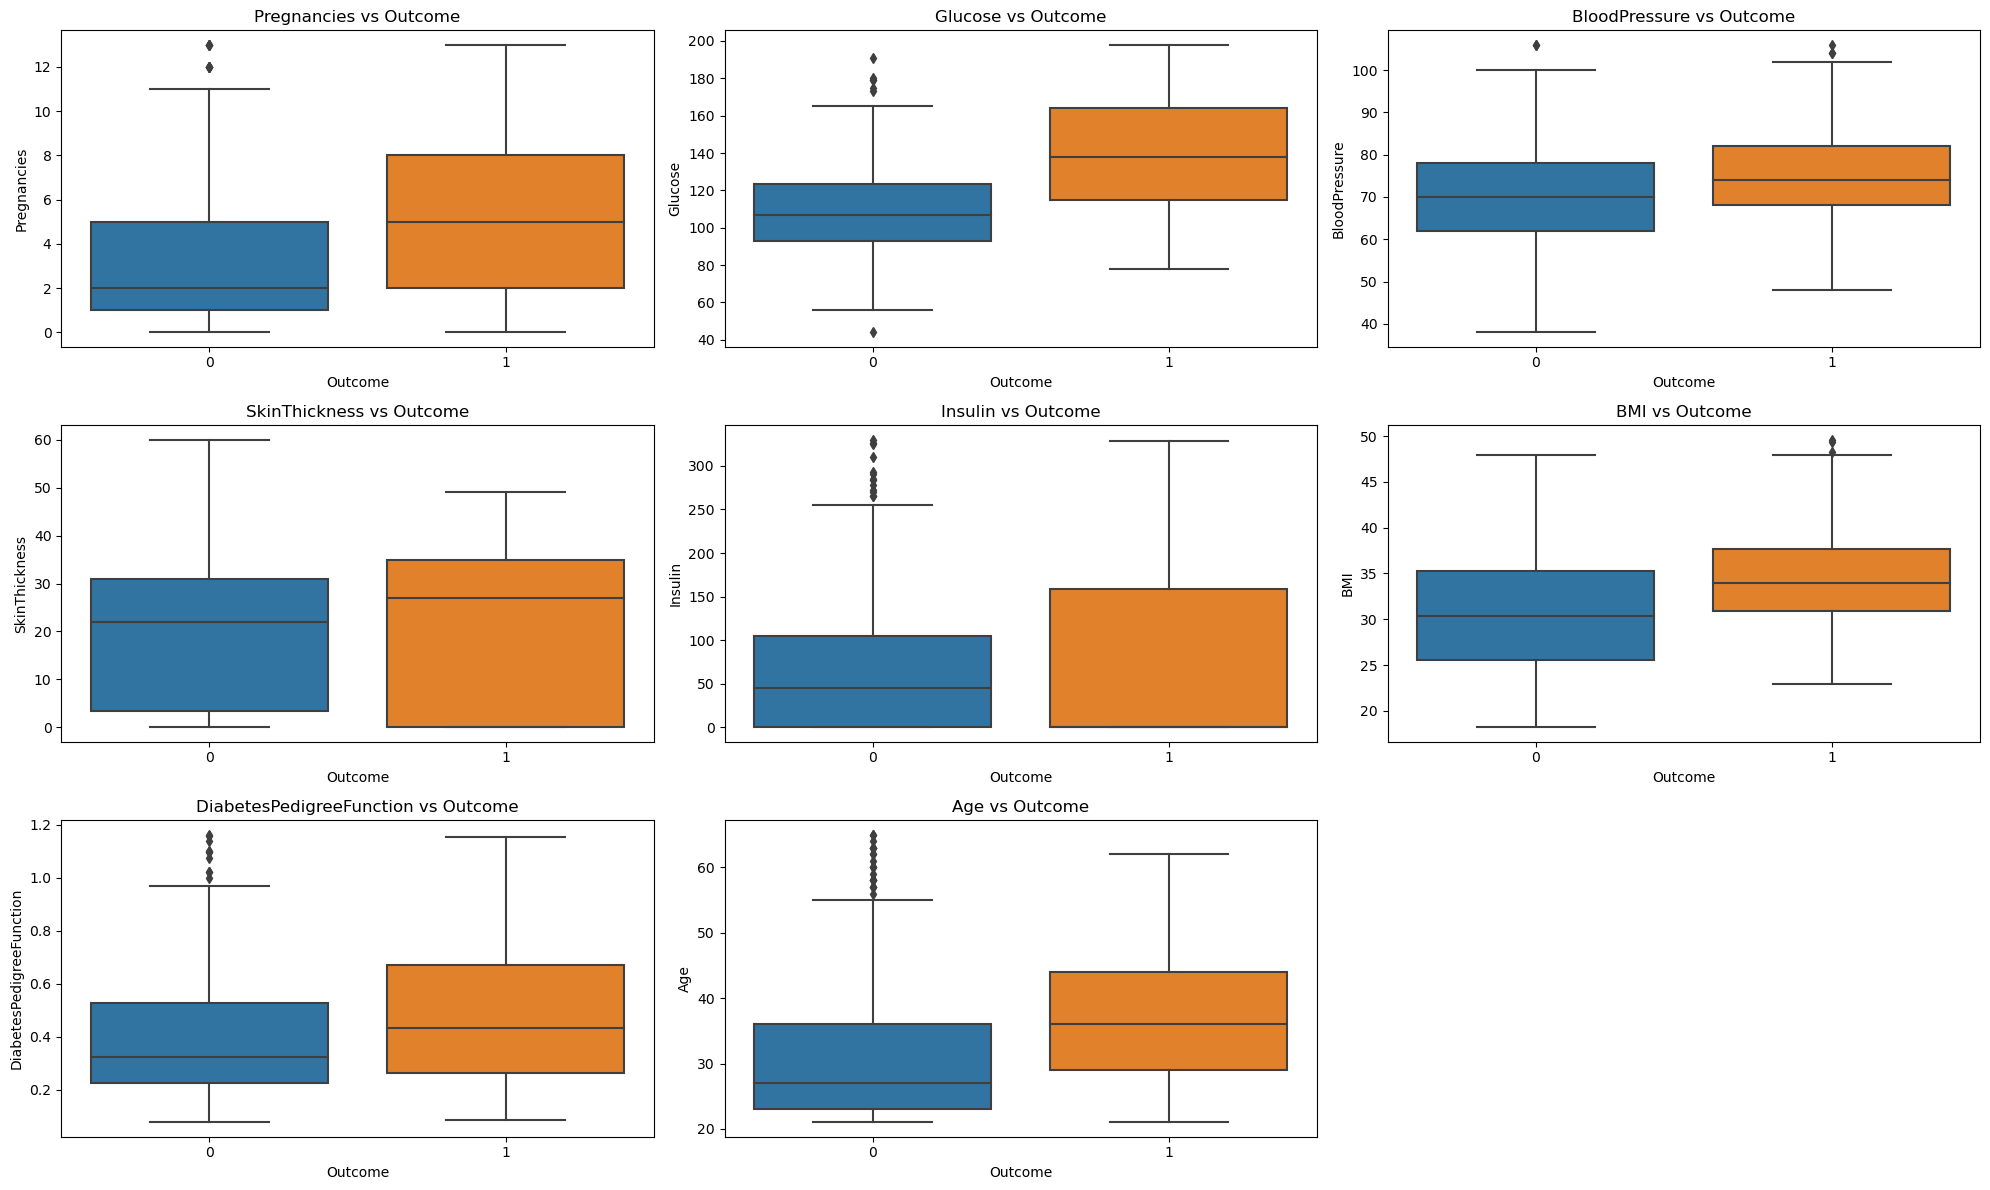

In [83]:
# Plot Boxplot for each Feature vs Outcome for cleaned dataset
plt.figure(figsize=(20, 12))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)  
    sns.boxplot(x='Outcome', y=feature, data=data_cleaned)
    plt.title(f'{feature} vs Outcome')
plt.tight_layout()
plt.show()

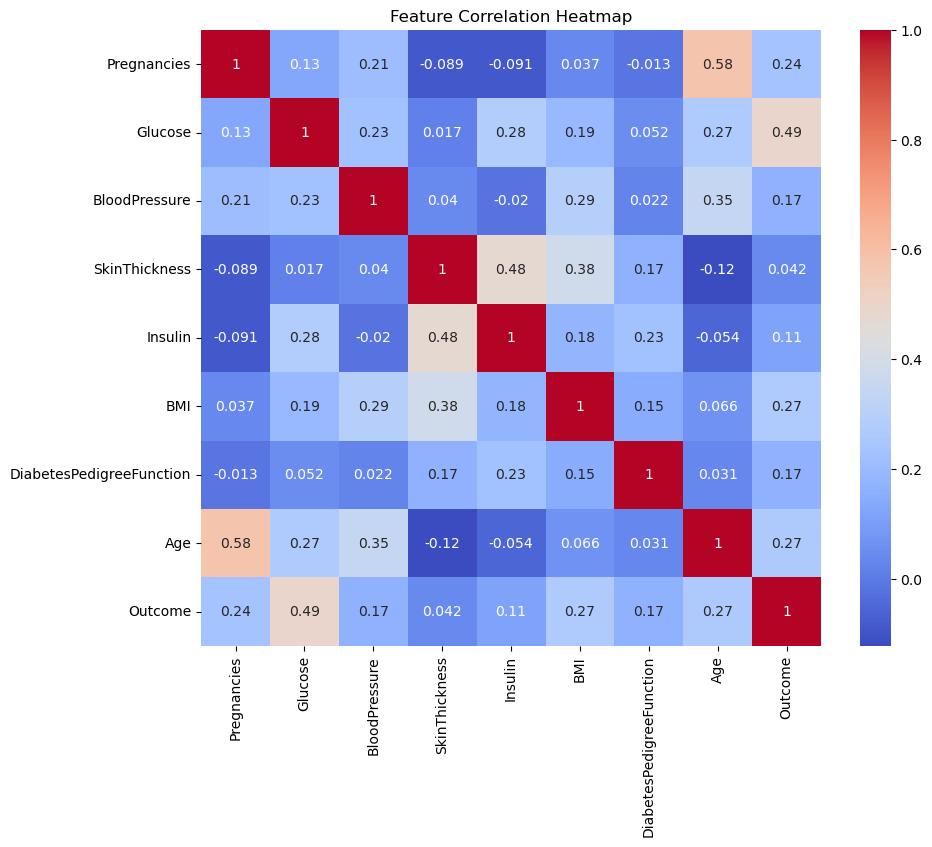

In [101]:
# Plot feature correlation heatmap for cleanned data
plt.figure(figsize=(10, 8))
correlation_matrix = data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## Baseline Model

In [85]:
# Creating baseline Perceptron Model
# Separating features and labels
X = data_cleaned.drop(columns=['Outcome'])  
y = data_cleaned['Outcome']  

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarised data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the Perceptron model
model = Sequential()
model.add(Dense(16, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Training model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Output accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuarcy of Model: {accuracy * 100:.4f}%")
print(classification_report(y_test, y_pred))

Epoch 1/50


/Users/chenjiayi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.4549 - loss: 0.7363 - val_accuracy: 0.5196 - val_loss: 0.7296
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5676 - loss: 0.6949 - val_accuracy: 0.6078 - val_loss: 0.6961
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6397 - loss: 0.6736 - val_accuracy: 0.6667 - val_loss: 0.6700
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6789 - loss: 0.6603 - val_accuracy: 0.6765 - val_loss: 0.6471
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6899 - loss: 0.6342 - val_accuracy: 0.7157 - val_loss: 0.6251
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6933 - loss: 0.6305 - val_accuracy: 0.7647 - val_loss: 0.6031
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7289 - loss: 0.5975 - val_accuracy: 0.7745 - val_loss: 0.5804
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7141 - loss: 0.5941 - val_accuracy: 0.7941 - val_loss: 0.5580
E

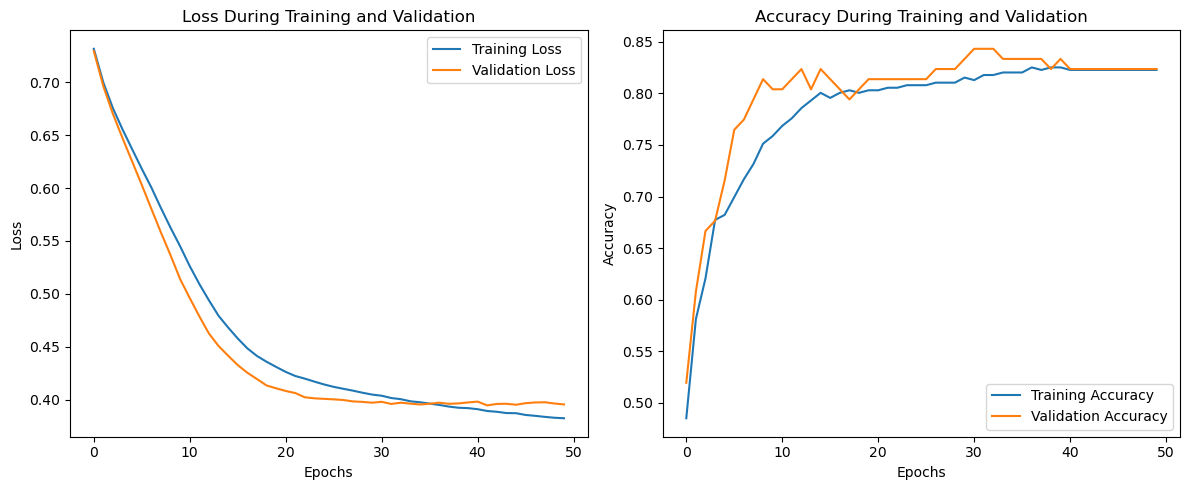

In [86]:
# Baseline model visuliaztion
# Visualize the changes in loss and accuracy during training
def plot_loss_accuracy(history):
    plt.figure(figsize=(12, 5))

    # Loss disgram
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss During Training and Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy diagram
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy During Training and Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_loss_accuracy(history)


## Model Improvement

In [87]:
# Baseline model improvement
# Manually delete the three features BloodPressure, insulin, and DiabetesPedigreeFunction
X = data_cleaned.drop(['Outcome', 'BloodPressure', 'Insulin', 'DiabetesPedigreeFunction'], axis=1)
y = data_cleaned['Outcome']

# Mananully set class weight
class_weights = {0: 1, 1: 15}  

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.reset_index(drop=True)

# Standarised data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the improved Perceptron model
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate the model on the test set
y_pred_prob = model.predict(X_test_scaled) 
y_pred = (y_pred_prob > 0.55).astype('int32')

# Output accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Model:{accuracy * 100:.4f}%")
print(classification_report(y_test, y_pred))



Epoch 1/50


/Users/chenjiayi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6057 - loss: 0.7682 - val_accuracy: 0.7353 - val_loss: 0.7010
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6951 - loss: 0.6881 - val_accuracy: 0.7745 - val_loss: 0.6059
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7285 - loss: 0.6109 - val_accuracy: 0.8235 - val_loss: 0.5389
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7334 - loss: 0.5689 - val_accuracy: 0.8235 - val_loss: 0.5106
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7338 - loss: 0.5854 - val_accuracy: 0.8039 - val_loss: 0.5042
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7402 - loss: 0.5715 - val_accuracy: 0.8235 - val_loss: 0.4892
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7751 - loss: 0.5302 - val_accuracy: 0.8431 - val_loss: 0.4796
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7443 - loss: 0.5744 - val_accuracy: 0.8235 - val_loss: 0.4809
Ep

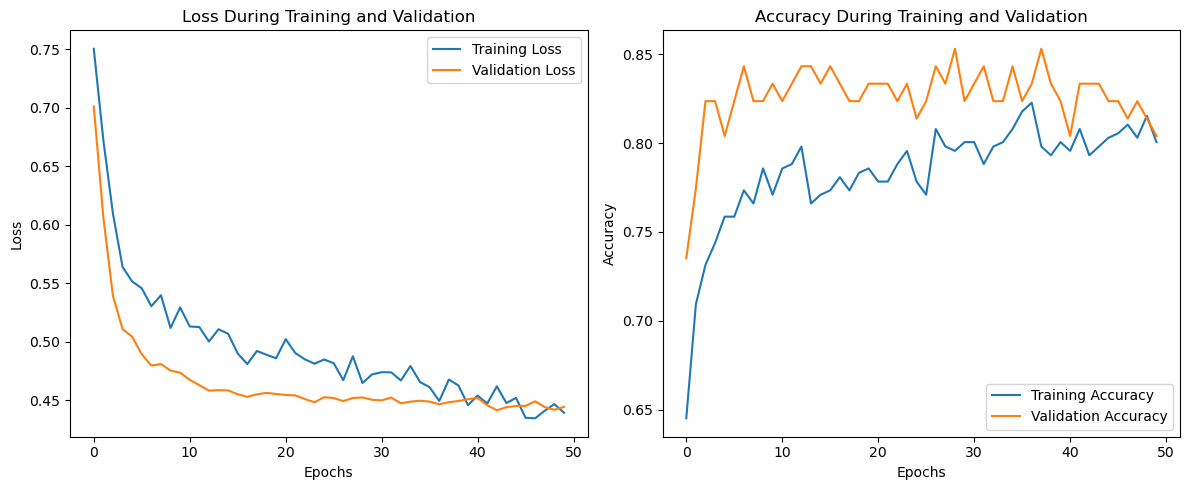

In [88]:
# Improved model visuliaztion
# Visualize the changes in loss and accuracy during training
def plot_loss_accuracy(history):
    plt.figure(figsize=(12, 5))

    # Loss diagram
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss During Training and Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy diagram
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy During Training and Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_loss_accuracy(history)